In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import csv data
df = pd.read_csv('netflix_titles.csv')
df.drop(columns=['show_id', 'cast', 'description'], inplace=True)
df = df.dropna(subset='country')
df['type'] = df['type'].astype('category')
df['country'] = df['country'].astype(str)
df['director'] = df['director'].astype(str)
df['duration'] = df['duration'].astype(str)

# Get unique countries
countries = list(df['country'].dropna().unique())
unique_countries = []
for country in countries:
    unique_countries.extend([c.strip() for c in country.split(',')])

unique_countries = set(unique_countries)
unique_countries.remove('')

# Get unique directors
dirs = list(df['director'].dropna().unique())
unique_dirs = []
for dr in dirs:
    unique_dirs.extend([d.strip() for d in dr.split(',')])

unique_dirs = set(unique_dirs)

# Make movie and tv dictionaries
movie_counts = {}
movie_ratings = {}
movie_durations = {}
movie_years = {}
movie_added = {}

tv_counts = {}
tv_ratings = {}
tv_seasons = {}
tv_years = {}
tv_added = {}

for country in sorted(unique_countries):
    movie_counts[country] = len(df[(df['country'].str.contains(country)) & (df['type'] == 'Movie')])
    movie_ratings[country] = df[(df['country'].str.contains(country)) & (df['type'] == 'Movie')].value_counts('rating').to_dict()
    movie_durations[country] = [int(dur.replace(' min', '')) for dur in df.loc[(df['country'].str.contains(country)) & (df['type'] == 'Movie'), 'duration'] if 'nan' not in dur]
    movie_years[country] = df.loc[(df['country'].str.contains(country)) & (df['type'] == 'Movie'), 'release_year'].dropna().to_list()
    movie_added[country] = df.loc[(df['country'].str.contains(country)) & (df['type'] == 'Movie'), 'date_added'].dropna().to_list()
    
    tv_counts[country] = len(df[(df['country'].str.contains(country)) & (df['type'] == 'TV Show')])
    tv_ratings[country] = df[(df['country'].str.contains(country)) & (df['type'] == 'TV Show')].value_counts('rating').to_dict()
    tv_seasons[country] = [int(dur.replace(' Season', '').replace('s', '')) for dur in df.loc[(df['country'].str.contains(country)) & (df['type'] == 'TV Show'), 'duration'] if 'nan' not in dur]
    tv_years[country] = df.loc[(df['country'].str.contains(country)) & (df['type'] == 'TV Show'), 'release_year'].dropna().to_list()
    tv_added[country] = df.loc[(df['country'].str.contains(country)) & (df['type'] == 'TV Show'), 'date_added'].dropna().to_list()

# Make director dictionary
director_counts = {}

for d in sorted(unique_dirs):
    director_counts[d] = len(df[df['director'].str.contains(d)])
    
# Get year counts
movie_year_counts = {}
tv_year_counts = {}
movie_added_counts = {}
tv_added_counts = {}

for country in sorted(unique_countries):
    years = movie_years[country]
    movie_hist = np.histogram(years, bins=range(1980, 2022))
    movie_year_counts[country] = [movie_hist[1][:-1], movie_hist[0]]
    
    years = tv_years[country]
    tv_hist = np.histogram(years, bins=range(1980, 2022))
    tv_year_counts[country] = [tv_hist[1][:-1], tv_hist[0]]
    
    years = movie_added[country]
    years = [int(year.split(' ')[-1]) for year in years]
    movie_hist = np.histogram(years, bins=range(1997, 2022))
    movie_added_counts[country] = [movie_hist[1][:-1], movie_hist[0]]
    
    years = tv_added[country]
    years = [int(year.split(' ')[-1]) for year in years]
    tv_hist = np.histogram(years, bins=range(1997, 2022))
    tv_added_counts[country] = [tv_hist[1][:-1], tv_hist[0]]


In [5]:
list(movie_counts.keys())[0]

'Afghanistan'

In [9]:
country_list = list(movie_counts.keys())
count_list = list(movie_counts.values())

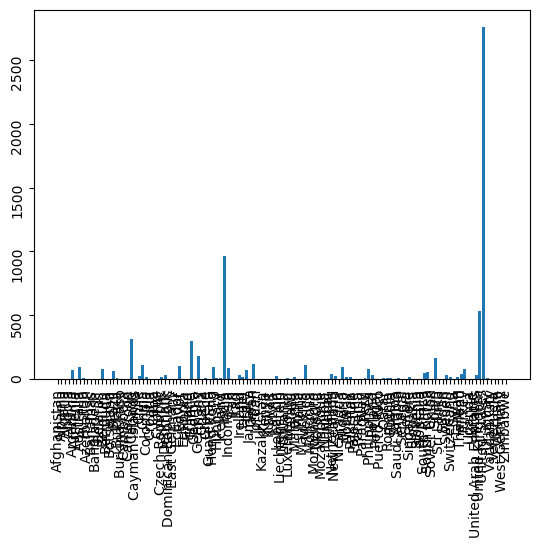

In [12]:
fig, ax = plt.subplots(1,1)

ax.bar(country_list, count_list)
ax.tick_params(labelrotation = 90)

plt.show()

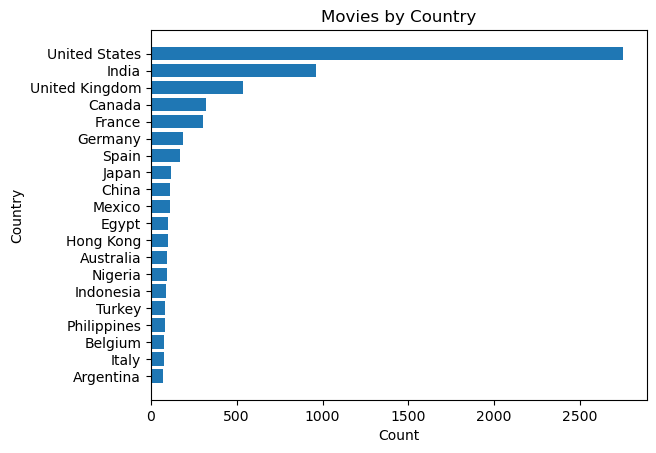

In [25]:
country_list_movies = [tup[0] for tup in sorted(movie_counts.items(), key= lambda x:x[1], reverse = True)[:20]]
count_list_movies = [tup[1] for tup in sorted(movie_counts.items(), key= lambda x:x[1], reverse = True)[:20]]


country_list_tv = [tup[0] for tup in sorted(tv_counts.items(), key= lambda x:x[1], reverse = True)[:20]]
count_list_tv = [tup[1] for tup in sorted(tv_counts.items(), key= lambda x:x[1], reverse = True)[:20]]

fig,ax =plt.subplots(1,1)
ax.barh(country_list[:20],count_list[:20])
ax.invert_yaxis()
ax.set_xlabel("Count")
ax.set_ylabel("Country")
plt.title("Movies by Country")
plt.show()

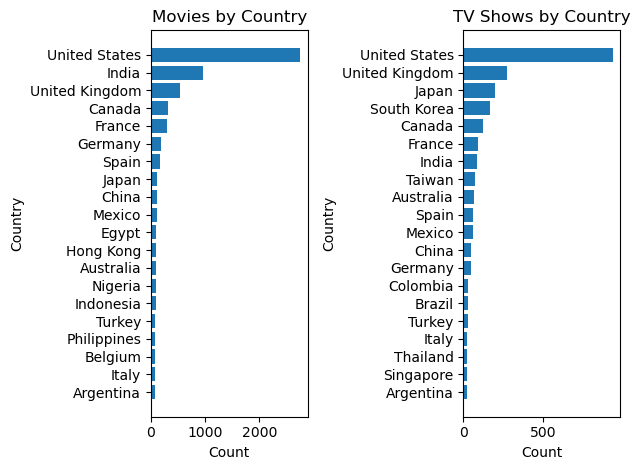

In [27]:
fig, axs = plt.subplots(1,2)

axs[0].barh(country_list_movies[:20],count_list_movies[:20])
axs[0].invert_yaxis()
axs[0].set_xlabel("Count")
axs[0].set_ylabel("Country")
axs[0].set_title("Movies by Country")

axs[1].barh(country_list_tv[:20],count_list_tv[:20])
axs[1].invert_yaxis()
axs[1].set_xlabel("Count")
axs[1].set_ylabel("Country")
axs[1].set_title("TV Shows by Country")
plt.tight_layout()

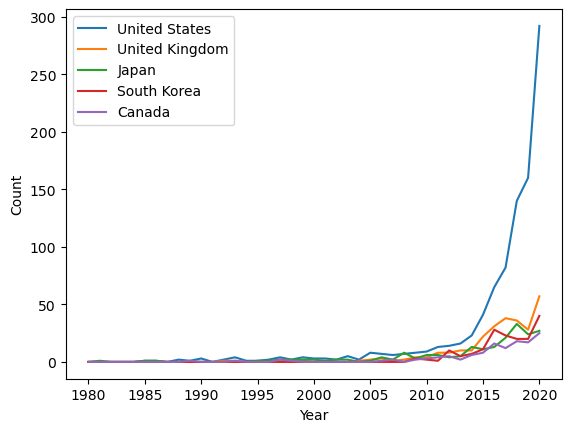

In [31]:
top5tv = country_list_tv[:5]

fig,ax= plt.subplots()
for country in top5tv:
    ax.plot(tv_year_counts[country][0], tv_year_counts[country][1], label = country)
    ax.set_xlabel("Year")
    ax.set_ylabel("Count")

plt.legend()
plt.show()